In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import os

In [3]:
folder    = "../data/"
contenido = os.listdir(folder)
my_data   = dict();
sensors   = ["Arapuca","SiPM1","SiPM2"]
# contenido = ["cajitav3.root","usual_geo.root","cajitav3_7cm_fuente1cm.root","cajitav3_7cm.root"]
# contenido = ["UsualGeo_30cm.root"]
contenido = ["final_v0.root"]
# contenido = ["UsualGeo_30cm.root","UsualGeo_70cm.root","UsualGeo_90cm.root","UsualGeo_90cm_1cm.root","UsualGeo_100cm.root","UsualGeo_105cm.root","UsualGeo_105cm_50mm.root"]

for file in contenido:

    f   = uproot.open(folder+file)
    var = dict();
    var["x"]    = f["Photons"]["fX"]   .array().to_numpy();
    var["y"]    = f["Photons"]["fY"]   .array().to_numpy();
    var["z"]    = f["Photons"]["fZ"]   .array().to_numpy();
    var["phi"]    = f["Photons"]["fPhi"]   .array().to_numpy();
    var["theta"]  = f["Photons"]["fTheta"] .array().to_numpy();
    var["fsensor"]= f["Photons"]["fsensor"].array().to_numpy();
    var["fsensor1"]= f["Hits"]["fsensor"]   .array().to_numpy();
    var["accumhits"]= f["Hits"]["acumHits"]   .array().to_numpy();

    my_data[file] = {}
    for i in range(len(sensors)):
        my_data[file][sensors[i]] = {}
        my_data[file][sensors[i]]["x"]   = var["x"]    [var["fsensor"]==i] 
        my_data[file][sensors[i]]["y"]   = var["y"]    [var["fsensor"]==i] 
        my_data[file][sensors[i]]["z"]   = var["z"]    [var["fsensor"]==i] 
        my_data[file][sensors[i]]["phi"]   = var["phi"]    [var["fsensor"]==i] 
        my_data[file][sensors[i]]["theta"] = var["theta"]  [var["fsensor"]==i] 

        my_data[file][sensors[i]]["accumhits"] = var["accumhits"]  [var["fsensor1"]==i] 
        my_data[file][sensors[i]]["accumhits"] = var["accumhits"]  [var["fsensor1"]==i] 

        # my_data[file][sensors[i]]["wlen"]    =var["wlen"]   [var["fsensor"]==i] 
        # my_data[file][sensors[i]]["fsensor"] = var["fsensor"][var["fsensor"]==i] 

In [4]:
sensors_info=dict(); #area and unitary vectors for each configuration file

for sensor in sensors:
    sensors_info[sensor]={};
    for file in contenido:
        sensors_info[sensor][file]={}
        if (sensor=="Arapuca"):      sensors_info[sensor][file]=np.array([0,1,0]) #always the same
        # if (sensor=="SiPM1"):        sensors_info[sensor][file]=np.array([0,1,0]) #always the same
        if (sensor=="SiPM1"):        sensors_info[sensor][file]=np.array([1,0,0]) #always the same
        # if (sensor=="SiPM2"):        sensors_info[sensor][file]=np.array([0,1,0]) #always the same
        if (sensor=="SiPM2"):        sensors_info[sensor][file]=np.array([1,0,0]) #always the same
# sensors_info["SiPM1"]["usual_geo.root"]      = np.array([1, 0 , 0])
# sensors_info["SiPM2"]["usual_geo.root"]      = np.array([1, 0 , 0])
print(sensors_info)

#add SiPM unitary vectors

# sensors_info["SiPM1"]["out.root"]      = np.array([ 1 ,0 ,0 ])
# sensors_info["SiPM2"]["out.root"]      = np.array([-1 ,0 ,0 ])

# sensors_info["SiPM1"]["FinalGeo_Vis.root"] = np.array([ 0 ,0 ,-1])
# sensors_info["SiPM2"]["FinalGeo_Vis.root"] = np.array([ 0 ,0 ,-1])
# sensors_info["SiPM1"]["FinalGeo_VUV.root"] = np.array([0 ,1 ,0 ])
# sensors_info["SiPM2"]["FinalGeo_VUV.root"] = np.array([0 ,1 ,0 ])

# sensors_info["SiPM2"]["Geo1_prod.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM2"]["Geo1_prod.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM1"]["Geo1_bonus_prod_paralel_ancho.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM2"]["Geo1_bonus_prod_paralel_ancho.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM1"]["Geo1_bonus_prod_paralel_largo.root"]      = np.array([ 0 ,0 ,1 ])
# sensors_info["SiPM2"]["Geo1_bonus_prod_paralel_largo.root"]      = np.array([ 0 ,0 ,1 ])
# sensors_info["SiPM1"]["Geo1_bonus_prod_perp_74mm.root"]      = np.array([ 1 ,0 ,0 ])
# sensors_info["SiPM2"]["Geo1_bonus_prod_perp_74mm.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM1"]["Geo1_bonus_prod_perp_100mm.root"]      = np.array([ 1 ,0 ,0 ])
# sensors_info["SiPM2"]["Geo1_bonus_prod_perp_100mm.root"]      = np.array([-1 ,0 ,0 ])
# sensors_info["SiPM1"]["Geo3_prod_largo.root"]= np.array([ 0 ,0 ,1 ])
# sensors_info["SiPM2"]["Geo3_prod_largo.root"]= np.array([ 0 ,0 ,1 ])
# sensors_info["SiPM1"]["Geo3_prod_ancho.root"]= np.array([-1 ,0 ,0 ])
# sensors_info["SiPM2"]["Geo3_prod_ancho.root"]= np.array([-1 ,0 ,0 ])

# for key in sensors_info:#Geo 2 has sipms facing upwars, same as Arapuca
#     if ("SiPM1" in key) or ("SiPM2" in key):
#         for geo_key in sensors_info[key]:
#              if "2" in geo_key:
#                 sensors_info[key][geo_key]=np.array([0,1,0])

sensors_info["Arapuca"]["Area"] = 143.75*143.75 #mm**2
sensors_info["SiPM1"]["Area"]   = 6*6 #mm**2
sensors_info["SiPM2"]["Area"]   = 6*6 #mm**2

{'Arapuca': {'final_v0.root': array([0, 1, 0])}, 'SiPM1': {'final_v0.root': array([1, 0, 0])}, 'SiPM2': {'final_v0.root': array([1, 0, 0])}}


In [5]:
# add angles

for geo_file in my_data.keys():
    for sensor in my_data[geo_file].keys():
        
        phi   = my_data[geo_file][sensor]["phi"]
        theta = my_data[geo_file][sensor]["theta"]
        
        abs_vec = np.array([ np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        norm    = np.sum(  (abs_vec.T*sensors_info[sensor][geo_file]),axis=1 )
        inc_ang = np.arccos(norm)
        
        my_data      [geo_file][sensor]["vector"]        = abs_vec
        my_data      [geo_file][sensor]["norm"]          = norm
        my_data      [geo_file][sensor]["inc_ang"]       = inc_ang
        if   ((np.mean(inc_ang)>np.pi/2)):my_data      [geo_file][sensor]["inc_ang_fixed"] = np.pi - inc_ang
        # if   ((np.pi/2<np.mean(inc_ang)<np.pi)):my_data        [geo_file][sensor]["inc_ang_fixed"] = inc_ang - 2*(inc_ang-np.pi/2)
        # if   ((np.pi<np.mean(inc_ang)<3*np.pi/2)):my_data      [geo_file][sensor]["inc_ang_fixed"] = np.pi -inc_ang
        # if   ((3*np.pi/2<np.mean(inc_ang)<2*np.pi)):my_data    [geo_file][sensor]["inc_ang_fixed"] = 3*np.pi/2 -inc_ang
        else                             :my_data      [geo_file][sensor]["inc_ang_fixed"] = inc_ang

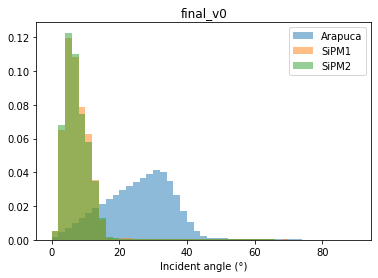

In [6]:
# for file in my_data:
#     if "Geo2" in file:
#         plt.figure()
#         plt.title(file.replace(".root",""))
#         for sensor in my_data[file]: 
#             plt.hist (my_data[file][sensor]      ["inc_ang_fixed"]*180/np.pi,45,[0,90],alpha=.5,density=True)
#         plt.xlabel("Incident angle (°)")
#         plt.legend(my_data[file].keys())
        
# for file in my_data:
#     if "Geo3" in file:
#         plt.figure()
#         plt.title(file.replace(".root",""))
#         for sensor in my_data[file]: 
#             plt.hist (my_data[file][sensor]      ["inc_ang_fixed"]*180/np.pi,45,[0,90],alpha=.5,density=True)
#         plt.xlabel("Incident angle (°)")
#         plt.legend(my_data[file].keys())

for file in my_data:
    # if "Geo1" in file:
        plt.figure()
        plt.title(file.replace(".root",""))
        for sensor in my_data[file]: 
            plt.hist (my_data[file][sensor]["inc_ang_fixed"]*180/np.pi,45,[0,90],alpha=.5,density=True,label=sensor)
        plt.xlabel("Incident angle (°)")
        plt.legend()


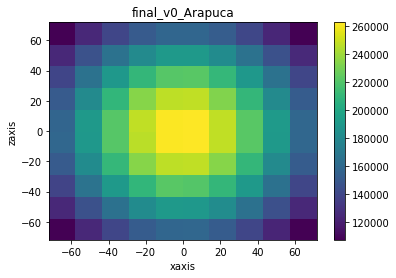

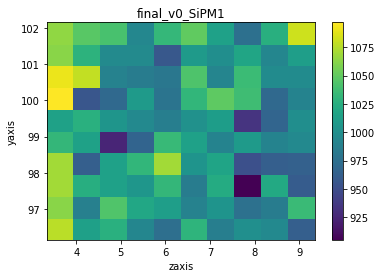

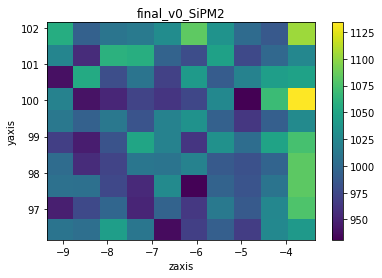

In [7]:
for file in my_data:
        for sensor in my_data[file]: 
            plt.figure()
            plt.title(file.replace(".root","_")+sensor)
            if "Arapuca" in sensor: 
                plt.hist2d(my_data[file][sensor]["x"],my_data[file][sensor]["z"])
                plt.xlabel("xaxis")
                plt.ylabel("zaxis")
            else: 
                plt.hist2d(my_data[file][sensor]["z"],my_data[file][sensor]["y"])
                plt.xlabel("zaxis")
                plt.ylabel("yaxis")
            plt.colorbar()
            plt.show()

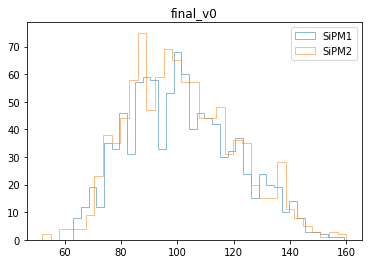

In [18]:
for file in my_data:
        plt.figure()
        plt.title(file.replace(".root",""))
        for sensor in my_data[file]: 
            if "Arapuca" not in sensor:
                plt.hist (my_data[file][sensor]["accumhits"], 35,alpha=0.5,histtype="step",label=sensor)
        plt.legend()
